In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=734ca441c5be6a6251262a6d977653cf1a749fda93895f1644abef9bf0b3fa09
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [4]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np
import h5py

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [5]:
dm = DataManager(transformer=False, micro=True)
X_trainhalflife, X_trainpromoter, y_train, _, X_traintf, X_trainmicro               = dm.get_train(True, False, True)
X_validationhalflife, X_validationpromoter, y_validation, _, X_validtf, X_valmicro  = dm.get_validation(True, False, True)
X_testhalflife, X_testpromoter, y_test, _, X_testtf, X_testmicro                    = dm.get_test(True, False, True)

Preprocessing-> Padding

In [6]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [7]:
X_trainpromoter_p         = X_trainpromoter[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos, :]
X_testpromoter_p          = X_testpromoter[:, leftpos:rightpos, :]

In [8]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainmicro = scaler.fit_transform(X_trainmicro)
X_valmicro = scaler.transform(X_valmicro)
X_testmicro = scaler.transform(X_testmicro)

svd = TruncatedSVD(n_components=100, random_state=42)
X_trainmicro = svd.fit_transform(X_trainmicro)
X_valmicro = svd.transform(X_valmicro)
X_testmicro = svd.transform(X_testmicro)

print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum())

print(svd.singular_values_)

[0.16040104 0.03459021 0.00730289 0.00486477 0.00394474 0.00296975
 0.00247362 0.00214173 0.0018595  0.00179868 0.00168733 0.00161145
 0.00157133 0.00154394 0.00147592 0.00143471 0.00141678 0.00139713
 0.00138507 0.00136741 0.00135393 0.00133884 0.00132125 0.00130482
 0.00129159 0.0012837  0.00127444 0.00126138 0.00124752 0.00124441
 0.00123462 0.00122437 0.00121664 0.00121164 0.00120875 0.00119196
 0.0011863  0.0011683  0.00116587 0.00115884 0.00115224 0.00113914
 0.0011359  0.00113072 0.00113049 0.00111893 0.00111728 0.00110917
 0.00110401 0.00109896 0.0010945  0.00109058 0.00108522 0.00107743
 0.00107709 0.00106758 0.00106018 0.00105587 0.00105437 0.00104712
 0.00103685 0.00103326 0.00103219 0.00102631 0.00102499 0.00102157
 0.00101811 0.00101777 0.00100923 0.00100362 0.00100111 0.00100014
 0.0009945  0.00099063 0.00098637 0.00097694 0.00096953 0.00096738
 0.00096561 0.00096013 0.0009539  0.00095072 0.00094264 0.00094206
 0.00094011 0.00093306 0.00093169 0.00092639 0.00092549 0.0009

model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 128)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 350, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 350, 32)      36896       max_pooling1d[0][0]              
__________________________________________________________________________________

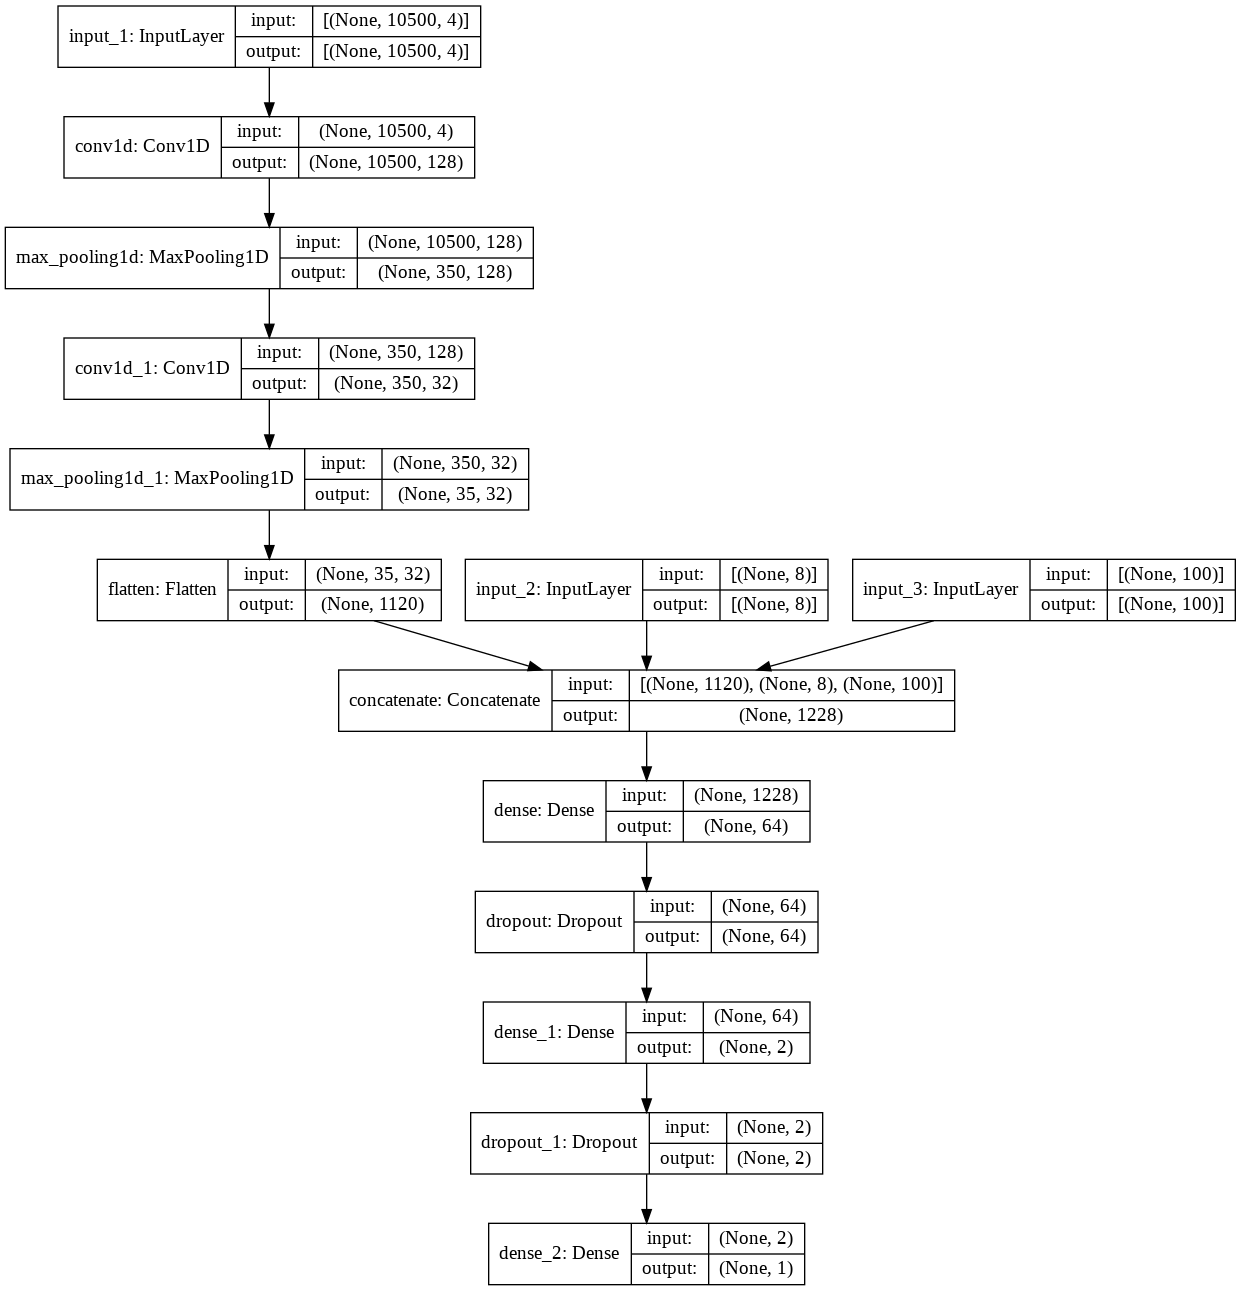


Parameters:
{'checkpoint_dir': 'micro1/', 'model_type': 'Xpresso_micro', 'n_epochs': 100, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (100,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': None, 'patience': 7, 'opt': 'SGD', 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fb29005c8d0>}

Epoch 1/100
125/125 [==============================] - 63s 269ms/step - loss: 0.9646 - val_loss: 0.8938

Epoch 00001: val_loss improved from inf to 0.89381, saving model to Saved_Models/checkpoint/micro1/bestmodel_CNN1D_Xpresso_micro
INFO:tensorflow:Assets written to: Saved_Models/checkpoint/micro1/bestmodel_CNN1D_Xpresso_micro/assets
Epoch 2/100
125/125 [==============================] - 33s 265ms/step - loss: 0.8808 - val_loss: 0.8467

Epoch 00002: val_loss improved from 0.89381 to 0.84673, saving model to Saved_Models/checkpoint/micro1/bestmodel_CNN1D_Xpresso

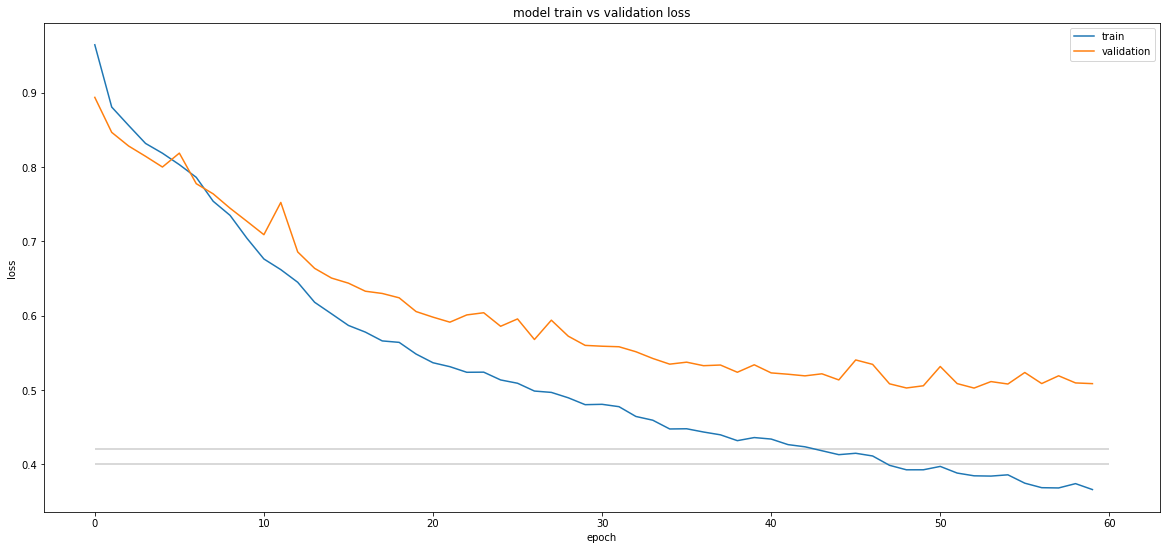

In [9]:
# # Clear any logs from previous runs
#!rm -rf ./logs/Xpresso_micro-006/
# maxlen=18850
model_type="Xpresso_micro"
checkpoint_dir="micro1/"
logdir = None #f"{model_type}_0-006"
net = projCNN1D(shuffle=True, checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=100, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir, patience=7, miRNA_input=(100,))
net.train_model([X_trainpromoter_p, X_trainhalflife, X_trainmicro], y_train, [X_validationpromoter_p, X_validationhalflife, X_valmicro], y_validation)

Evaluate Xpresso_Micro

In [10]:
net.evaluate([X_testpromoter_p, X_testhalflife, X_testmicro], y_test)

Test R^2 = 0.504


0.5040809211662078

In [11]:
net.evaluate_best([X_testpromoter_p, X_testhalflife, X_testmicro], y_test)

Test R^2 = 0.509


0.509213087263448

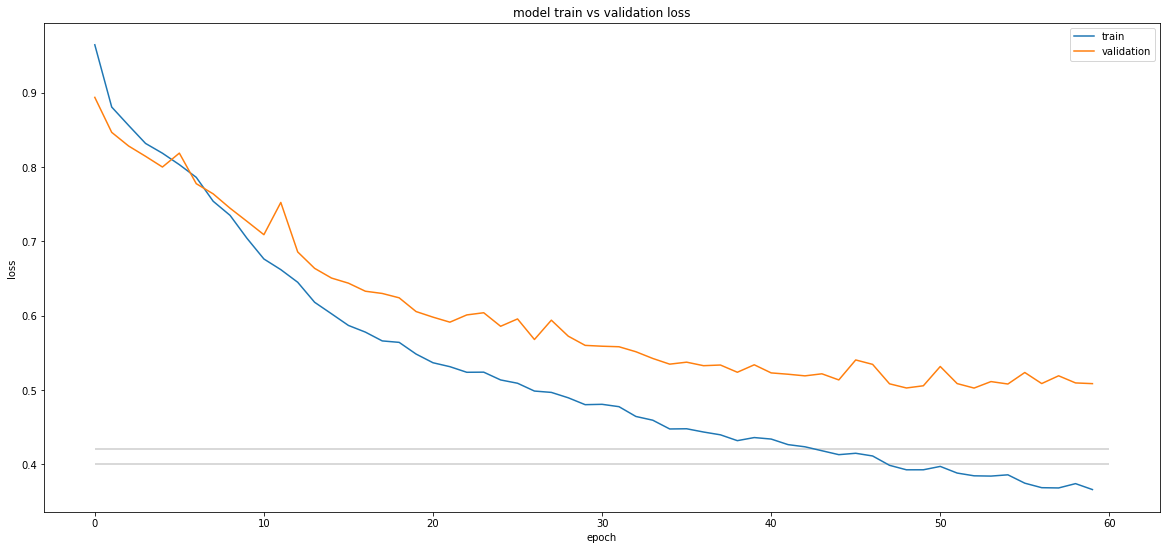

In [12]:
net.plot_train()

No handles with labels found to put in legend.


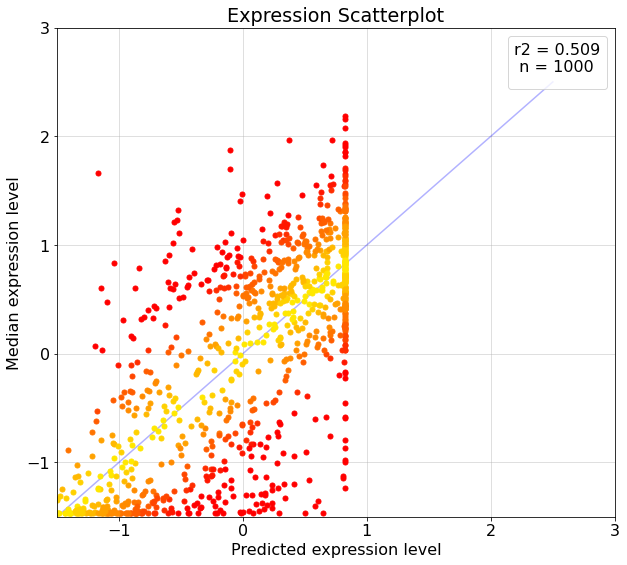

In [13]:
net.plot_r2([X_testpromoter_p, X_testhalflife, X_testmicro], y_test)

model built
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 10500, 128)   3200        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 350, 128)     0           conv1d_2[0][0]                   
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 350, 32)      36896       max_pooling1d_2[0][0]            
________________________________________________________________________________

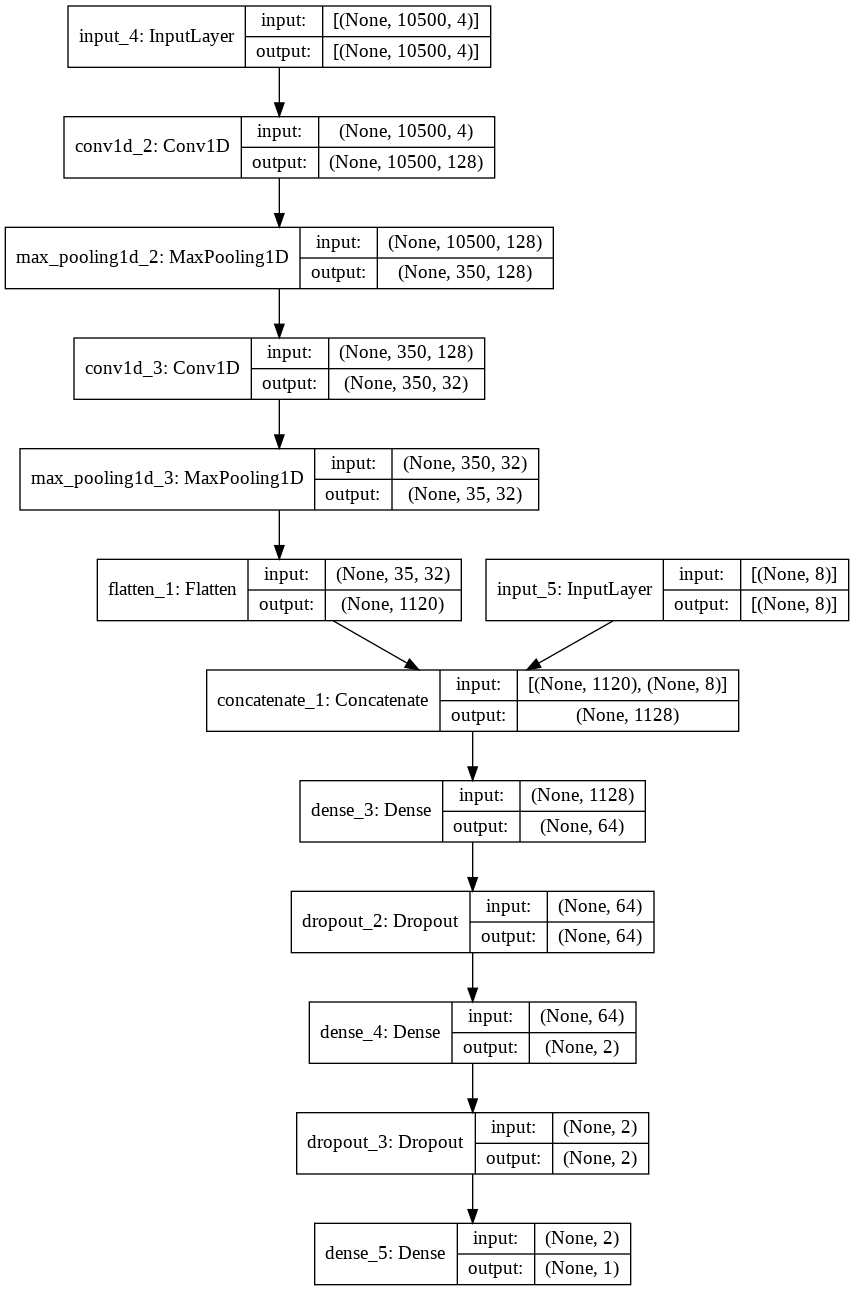


Parameters:
{'checkpoint_dir': 'micro1X_1/', 'model_type': 'Xpresso', 'n_epochs': 100, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': None, 'patience': 7, 'opt': 'SGD', 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fb1f4a19590>}

Epoch 1/100
125/125 [==============================] - 33s 263ms/step - loss: 0.9493 - val_loss: 0.8665

Epoch 00001: val_loss improved from inf to 0.86647, saving model to Saved_Models/checkpoint/micro1X_1/bestmodel_CNN1D_Xpresso
INFO:tensorflow:Assets written to: Saved_Models/checkpoint/micro1X_1/bestmodel_CNN1D_Xpresso/assets
Epoch 2/100
125/125 [==============================] - 33s 263ms/step - loss: 0.8787 - val_loss: 0.8370

Epoch 00002: val_loss improved from 0.86647 to 0.83697, saving model to Saved_Models/checkpoint/micro1X_1/bestmodel_CNN1D_Xpresso
INFO

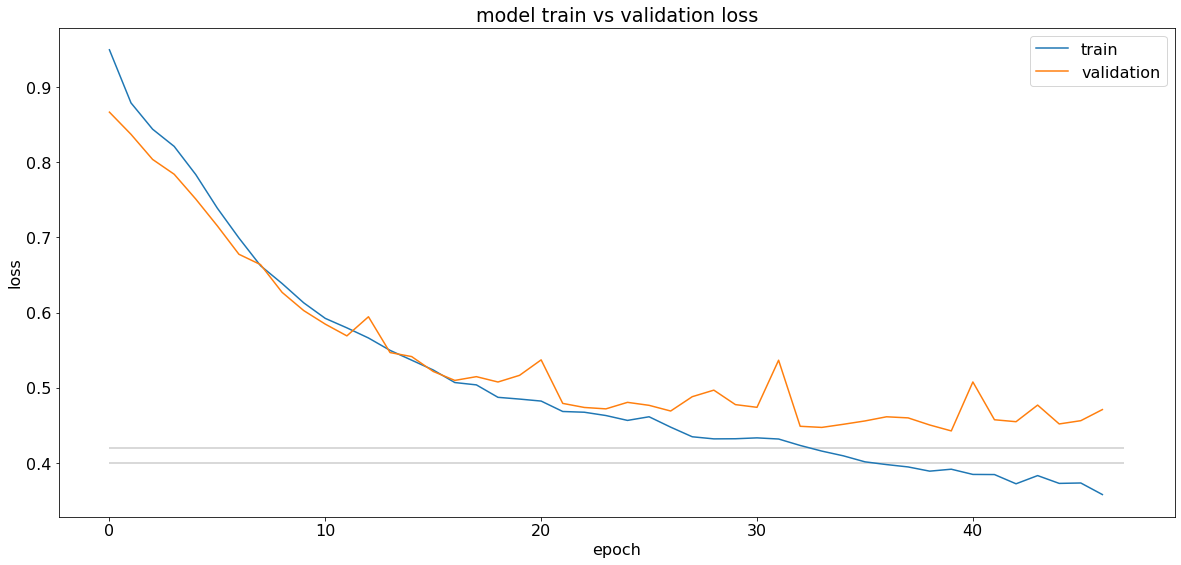

In [14]:
# # Clear any logs from previous runs
#!rm -rf ./logs/micro1X-006/
# maxlen=18850
model_type="Xpresso"
checkpoint_dir="micro1X_1/"
logdir = None#f"{model_type}_0-006"
net2 = projCNN1D(shuffle=True, checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=100, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir, patience=7)
net2.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation)

In [15]:
net2.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.559


0.5591207442236032

In [16]:
net2.evaluate_best([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.563


0.562667491307167

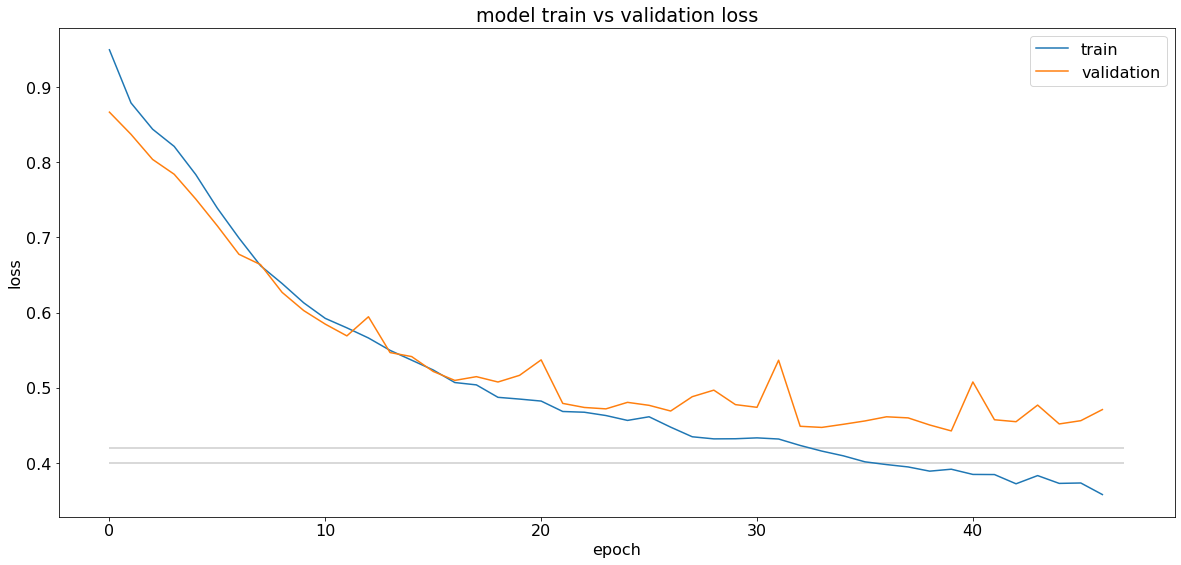

In [17]:
net2.plot_train()

No handles with labels found to put in legend.


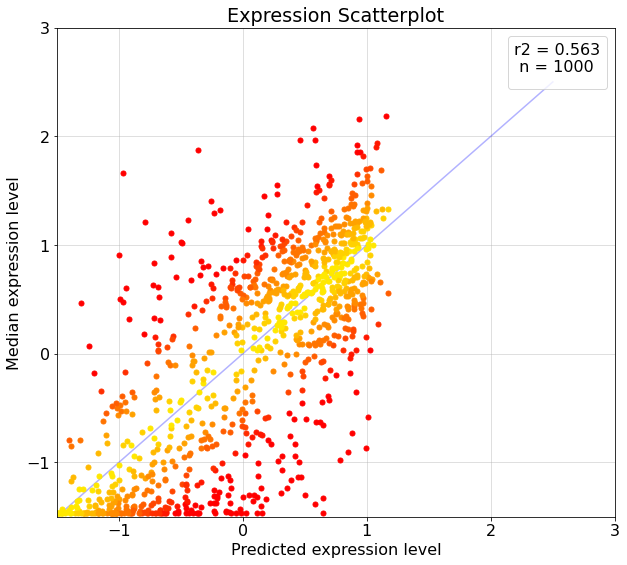

In [18]:
net2.plot_r2([X_testpromoter_p, X_testhalflife], y_test)